In [1]:
%matplotlib inline
#Aref HW 5
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import random

# File to Load (Remember to change these datafile locations and directories)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Read the City and Ride Data



In [2]:
combined_df = pd.merge(ride_df, city_df,how='outer', on='city')
# cleanup missing value rows

clean_df = combined_df.dropna()
sorted_df = combined_df.sort_values('type')



In [3]:
#cleanup and get rid of unneeded columns for this requirement set

#sorted_df.drop(sorted_df.columns[[2, 4]], axis=1)



In [4]:





#pie charts
# Create a group based on the values in the 'type' column
type_group = sorted_df.groupby('type')

# Count how many times each maker appears in our group
count_type = type_group['city'].count()


In [5]:
#  % of Total Fares by City Type
urban_fares = sorted_df.loc[sorted_df['type'] == "Urban", 'fare'].sum()
suburban_fares = sorted_df.loc[sorted_df['type'] == "Suburban", 'fare'].sum()
rural_fares = sorted_df.loc[sorted_df['type'] == "Rural", 'fare'].sum()
total_fares = urban_fares + suburban_fares + rural_fares
pct_suburban = suburban_fares/total_fares
pct_urban = urban_fares/total_fares
pct_rural = rural_fares/total_fares


print ("Urban: ",'${:,.2f}'.format(urban_fares), "{0:.2%}".format(pct_urban), "  Suburban: ", '${:,.2f}'.format(suburban_fares), "{0:.2%}".format(pct_suburban), "   Rural: ", '${:,.2f}'.format(rural_fares), "{0:.2%}".format(pct_rural))

Urban:  $39,854.38 62.72%   Suburban:  $19,356.33 30.46%    Rural:  $4,327.93 6.81%


Text(0.5,1,'% of Total Fares by City Type\n')

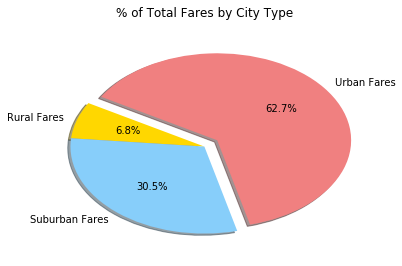

In [6]:




members = [ rural_fares, suburban_fares, urban_fares]
explode = (0, 0, 0.12)
fares = ["Rural Fares", "Suburban Fares", "Urban Fares"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(members, explode=explode, labels=fares, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type\n")

In [7]:
#  % of Total Rides by City Type
urban_rides = sorted_df.loc[sorted_df['type'] == "Urban", 'fare'].count()
suburban_rides = sorted_df.loc[sorted_df['type'] == "Suburban", 'fare'].count()
rural_rides = sorted_df.loc[sorted_df['type'] == "Rural", 'fare'].count()
total_rides = urban_rides + suburban_rides + rural_rides
pct_suburban_ride = suburban_rides/total_rides
pct_urban_ride = urban_rides/total_rides
pct_rural_ride = rural_rides/total_rides


print ("Urban: ",urban_rides, "{0:.2%}".format(pct_urban_ride), "  Suburban: ", suburban_rides, "{0:.2%}".format(pct_suburban_ride), "   Rural: ", rural_rides, "{0:.2%}".format(pct_rural_ride))

Urban:  1625 68.42%   Suburban:  625 26.32%    Rural:  125 5.26%


Text(0.5,1,'% of Total Rides by City Type\n')

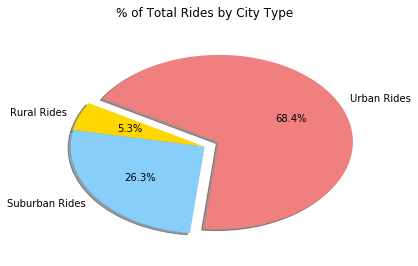

In [8]:


members = [ rural_rides, suburban_rides, urban_rides]
explode = (0, 0, 0.12)
fares = ["Rural Rides", "Suburban Rides", "Urban Rides"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(members, explode=explode, labels=fares, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type\n")

In [9]:
#  % of Total Drivers by City Type


urban_drivers = city_df.loc[city_df['type'] == "Urban", 'driver_count'].sum()
suburban_drivers = city_df.loc[city_df['type'] == "Suburban", 'driver_count'].sum()
rural_drivers = city_df.loc[city_df['type'] == "Rural", 'driver_count'].sum()

total_drivers = urban_drivers + suburban_drivers + rural_drivers
pct_suburban_drivers = suburban_drivers/total_drivers
pct_urban_drivers = urban_drivers/total_drivers
pct_rural_drivers = rural_drivers/total_drivers

print ("Urban: ",urban_drivers, "{0:.2%}".format(pct_urban_drivers), "  Suburban: ", suburban_drivers, "{0:.2%}".format(pct_suburban_drivers), "   Rural: ", rural_drivers, "{0:.2%}".format(pct_rural_drivers))

Urban:  2405 80.89%   Suburban:  490 16.48%    Rural:  78 2.62%


Text(0.5,1,'% of Total Drivers by City Type\n')

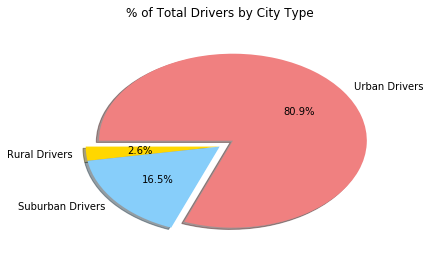

In [10]:
members = [ rural_drivers, suburban_drivers, urban_drivers]
explode = (0, 0, 0.12)
drivers = ["Rural Drivers", "Suburban Drivers", "Urban Drivers"]
colors = ["gold", "lightskyblue", "lightcoral"]


plt.pie(members, explode=explode, labels=drivers, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type\n")

# sorted_df.head()


## Bubble Plot of Ride Sharing Data

In [11]:
# Obtain the x and y coordinates for each of the three city types
# i do not understand what this means so i did x and y for the collective
#Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:


urbans = sorted_df[sorted_df["type"]=="Urban"]
suburbans = sorted_df[sorted_df["type"]=="Suburban"]
rurals = sorted_df[sorted_df["type"]=="Rural"]

driver_urbans = city_df[city_df["type"]=="Urban"]
driver_suburbans = city_df[city_df["type"]=="Suburban"]
driver_rurals = city_df[city_df["type"]=="Rural"]

group_urbans_avg_fares = urbans.groupby("city").mean()["fare"]
group_urbans_total_rides = urbans.groupby("city").count()["ride_id"]

group_suburbans_avg_fares = suburbans.groupby("city").mean()["fare"]
group_suburbans_total_rides = suburbans.groupby("city").count()["ride_id"]

group_rurals_avg_fares = rurals.groupby("city").mean()["fare"]
group_rurals_total_rides = rurals.groupby("city").count()["ride_id"]



# Count how many times each city specs appears in our groupby - urbans
ucity_occurence_count = urbans['city'].count()
#* Average Fare ($) Per City
ucity_avg_fare = urbans['fare'].mean()
#* Total Number of Rides Per City
ucity_total_rides = urbans['ride_id'].count()
#* Total Number of Drivers Per City <<<=============================================HELP
ucity_total_drivers = driver_urbans.groupby("city").sum()['driver_count']
ucity_total_drivers


# Count how many times each city specs appears in our groupby - suburbans
scity_occurence_count = suburbans['city'].count()
#* Average Fare ($) Per City
scity_avg_fare = suburbans['fare'].mean()
#* Total Number of Rides Per City
scity_total_rides = suburbans['ride_id'].count()
#* Total Number of Drivers Per City <<<=============================================HELP
scity_total_drivers = driver_suburbans.groupby("city").sum()['driver_count']



# Count how many times each city specs appears in our groupby - rurals
rcity_occurence_count = rurals['city'].count()
#* Average Fare ($) Per City
rcity_avg_fare = rurals['fare'].mean()
#* Total Number of Rides Per City
rcity_total_rides = rurals['ride_id'].count()
#* Total Number of Drivers Per City <<<=============================================HELP
rcity_total_drivers = driver_rurals.groupby("city").sum()['driver_count']









#You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
#* Remember when making your plots to consider aesthetics!
#  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.





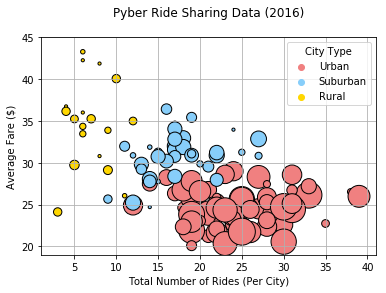

In [64]:
#* City Type (Urban, Suburban, Rural)
#calculated way up there
#color_seq = {"gold", "lightskyblue", "lightcoral"}
x=group_urbans_total_rides 
y=group_urbans_avg_fares
#s_urbans=driver_urbans

x1=group_suburbans_total_rides 
y1=group_suburbans_avg_fares

x2=group_rurals_total_rides 
y2=group_rurals_avg_fares 

plt.xlim((1,41))

plt.ylim((19,45))
plt.scatter(x,y, s=ucity_total_drivers*10, c="lightcoral", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black")
plt.scatter(x1,y1, s=scity_total_drivers*10, c="lightskyblue", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black")
plt.scatter(x2,y2, s=rcity_total_drivers*10, c="gold", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black")


#Plot Titles, Axes Labels, Legend Labels


ulegend = plt.scatter(0,0, marker='o', color="lightcoral")
slegend = plt.scatter(0,0, marker='o', color="lightskyblue")
rlegend = plt.scatter(0,0, marker='o', color="gold")


plt.legend((ulegend, slegend, rlegend),
           ('Urban', 'Suburban', 'Rural'),
            scatterpoints=1,
            loc='upper right',
             title = "City Type",
            ncol=1,
            fontsize=10)


plt.xlabel("Total Number of Rides (Per City)", fontsize=10)
plt.ylabel("Average Fare ($)", fontsize=10)
plt.title("Pyber Ride Sharing Data (2016)\n")
plt.grid(True)
plt.show()
